In [3]:
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()
x = digits.data
y = digits.target

In [4]:
noisy_digits = x + np.random.normal(0,4,size=x.shape)

In [7]:
example_digits = noisy_digits[y==0,:][:10]
for num in range(1,10):
    x_num = noisy_digits[y==num,:][:10]
    example_digits = np.vstack([example_digits, x_num])

In [25]:
import matplotlib.pyplot as plt
def plot_digits(data):
    fig, axes = plt.subplots(10,10,figsize=(10,10),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1,wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),
                 cmap='binary',interpolation='nearest',
                 clim=(0,16))
    plt.show()


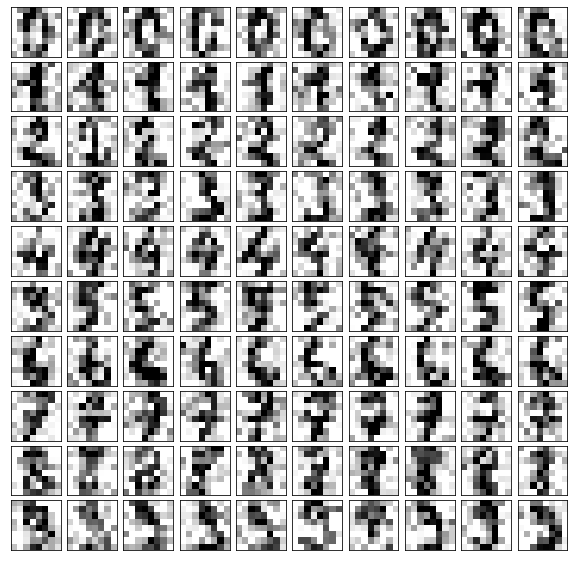

In [26]:
plot_digits(example_digits)

In [31]:
from sklearn.decomposition import PCA
pca = PCA(0.5)
pca.fit(noisy_digits)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [32]:
pca.n_components_

12

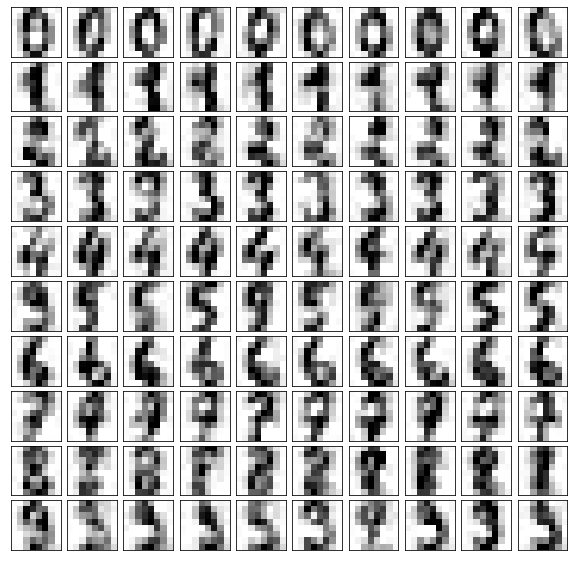

In [33]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)
plot_digits(filtered_digits)